In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats

In [11]:
df_ped=pd.read_csv(r'EFixations\WithRecordingTime\fixation_duration_ped.csv')
average_fixation_durations_ped = df_ped.groupby(['participant no','way', 'alert'])['fixation_duration'].mean()

# Reset index if you want to turn the grouped DataFrame back to a regular DataFrame
average_fixation_durations_ped = average_fixation_durations_ped.reset_index()

# Rename columns for clarity
average_fixation_durations_ped.columns = ['participant no','way', 'alert', 'Average Fixation Duration']
average_fixation_durations_ped

,participant no,way,alert,Average Fixation Duration
0,p1,approach,Baseline,21.861635
1,p1,approach,Bell,20.505882
2,p1,approach,Continuous,21.066465
3,p1,approach,Flash Light,20.809524
4,p1,approach,Voice,21.063444
...,...,...,...,...
75,p7,overtake,Baseline,35.318182
76,p7,overtake,Bell,27.776892
77,p7,overtake,Continuous,25.611722
78,p7,overtake,Flash Light,33.941748


In [7]:

df_cyc=pd.read_csv(r'Fixations\WithRecordingTime\fixation_duration_cyc.csv')
average_fixation_durations_cyc = df_cyc.groupby(['participant no','way', 'alert'])['fixation_duration'].mean()

# Reset index if you want to turn the grouped DataFrame back to a regular DataFrame
average_fixation_durations_cyc = average_fixation_durations_cyc.reset_index()

# Rename columns for clarity
average_fixation_durations_cyc.columns = ['participant no','way', 'alert', 'Average Fixation Duration']
average_fixation_durations_cyc

,participant no,way,alert,Average Fixation Duration
0,c10,approach,Baseline,22.862295
1,c10,approach,Bell,23.876712
2,c10,approach,Continuous,23.595819
3,c10,approach,Flash Light,24.211806
4,c10,approach,Voice,22.636364
...,...,...,...,...
75,c8,overtake,Baseline,23.637288
76,c8,overtake,Bell,28.929461
77,c8,overtake,Continuous,25.082734
78,c8,overtake,Flash Light,22.207006


In [10]:
average_fixation_durations_cyc['alert'].unique()

array(['Baseline', 'Bell', 'Continuous ', 'Flash Light', 'Voice'],
      dtype=object)

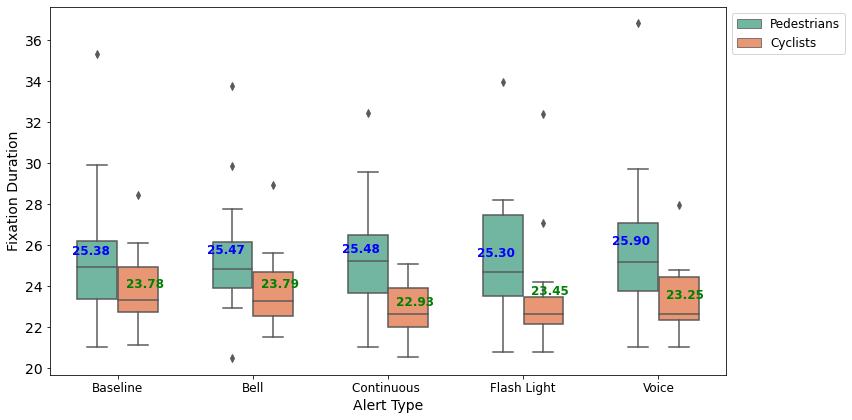

In [13]:
plt.rcParams.update({
    'font.size': 12,      # Set font size for all text
    'font.family': 'sans-serif',  # Change the font family (e.g., 'serif', 'sans-serif', etc.)
    'axes.titlesize': 16,    # Font size for title
    'axes.labelsize': 14,    # Font size for x and y labels
    'xtick.labelsize': 12,   # Font size for x ticks
    'ytick.labelsize': 14,   # Font size for y ticks
    'legend.fontsize': 12    # Font size for the legend
})


# Add a new column to differentiate between pedestrian and cyclist fixations
average_fixation_durations_ped['group'] = 'Pedestrians'
average_fixation_durations_cyc['group'] = 'Cyclists'

# Combine both dataframes
df_combined = pd.concat([average_fixation_durations_ped, average_fixation_durations_cyc])

# Create the boxplot with hue for differentiating pedestrians and cyclists
plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(x='alert', y='Average Fixation Duration', hue='group', data=df_combined, palette="Set2", width=0.6)

# Calculate means for pedestrians and cyclists separately
mean_values = df_combined.groupby(['alert', 'group'])['Average Fixation Duration'].mean().reset_index()

# Add mean values for both groups as text annotations on the plot
for i, row in mean_values.iterrows():
    x = list(df_combined['alert'].unique()).index(row['alert']) + (-0.2 if row['group'] == 'Pedestrians' else 0.2)
    plt.text(x, row['Average Fixation Duration'], f'{row["Average Fixation Duration"]:.2f}', color='blue' if row['group'] == 'Pedestrians' else 'green',
             ha="center", va="bottom", fontweight='bold')


# Set plot title and labels
#plt.title('Number of Fixations Across Alert Types - Pedestrians and Cyclists')
plt.xlabel('Alert Type')
plt.ylabel('Fixation Duration')

# Adjust legend placement
plt.legend( bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
